<a href="https://colab.research.google.com/github/BYRic-F/BYRic-F/blob/main/%5BS%5D_Creneau_2_Pandas_DataViz_Revision_Certif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Importation des données

In [ ]:
# Importation des données des top repositorie de github
df = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/refs/heads/main/datasets/Github_Project_Dataset.csv')

In [ ]:
df.head(2)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap


# Part 1 : Etude du dataframe

In [ ]:
# 1. Afficher les 10 premières lignes du dataset
?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24T19:33:49Z,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65.7k,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62k,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24T18:25:42Z,C++,61.6k,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,NaN,60.7k,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24T15:38:55Z,JavaScript,57.7k,"javascript,vue,framework,frontend",https://github.com/vuejs/vue
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56.2k,NaN,https://github.com/angular/angular.js


In [ ]:
# 2.1 Afficher les dimensions du dataset (nbr de lignes et de colonnes sous forme de tuple)
?

(980, 8)

In [ ]:
# 2.2 Afficher le type des colonnes
?

,0
Username,object
Repository Name,object
Description,object
Last Update Date,object
Language,object
Number of Stars,object
Tags,object
Url,object


In [ ]:
# 3. Afficher les valeurs manquantes par colonne
?

,0
Username,0
Repository Name,0
Description,3
Last Update Date,0
Language,103
Number of Stars,0
Tags,491
Url,0


In [ ]:
# 4. Afficher les statistiques descriptives du dataset
?

,count,unique,top,freq
Username,980,814,facebook,20
Repository Name,980,973,uBlock,2
Description,977,972,,3
Last Update Date,980,978,2017-06-23T08:57:24Z,2
Language,877,39,JavaScript,338
Number of Stars,980,215,7.8k,27
Tags,489,486,"javascript,nodejs",2
Url,980,979,https://github.com/slimphp/Slim,2


In [ ]:
# 4.1 Afficher les colonnes sous forme de liste
?

['Username',
 'Repository Name',
 'Description',
 'Last Update Date',
 'Language',
 'Number of Stars',
 'Tags',
 'Url']

# Part 2 : Processing des données

In [ ]:
# 5. Créer une nouvelle colonne "Annee_Mois" pour en faisant une conversion de la colonne "Last Update Date" l'année-mois d'update du repo "yyyy-mm"
# Le warning est normal, si tu veux l'enlever, regarde la documentation de la fonction tz_localize()
?
df.head(1)

<ipython-input-12-055ccd70e53a>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Annee_Mois'] = pd.to_datetime(df['Last Update Date']).dt.to_period('M')


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,2017-06


In [ ]:
# 6. Convertir le nb d'étoiles en entier
?
df.head(1)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290000,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp


In [ ]:
# 7. Créer une colonne 'Tranche_Stars' afin de créer des tranches pour la colonne 'number of stars' (0-1000, 1000-10000, 10000-100000, 100000-1000000)
# Indice : Utiliser la fonction Cut() pour simplifier
?
df['Tranche_Stars'][0:5]

,Tranche_Stars
0,100000-1000000
1,100000-1000000
2,10000-100000
3,10000-100000
4,10000-100000


In [ ]:
# 7.bis Créer une colonne 'Nb_Tags' pour compter le nombre de tags par repo en utilisant la colonne 'Tags'
?
df['Nb_Tags'][0:5]

,Nb_Tags
0,14
1,6
2,4
3,1
4,1


# Part 3 : Analyses

In [ ]:
# 8. Y'a t'il des doublons dans le dataset ? Si oui l'afficher
?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Tranche_Stars,Nb_Tags
670,slimphp,Slim,Slim Framework source code,2017-06-19T22:25:10Z,PHP,8000,NaN,https://github.com/slimphp/Slim,1000-10000,1


In [ ]:
#8. Supprimer le doublon
df.drop_duplicates(inplace=True)

In [ ]:
# 9. Combien de langages de programmation sont utilisés dans ce dataset ?
?

39

In [ ]:
# 9.bis Quels sont les langages de programmation utilisés dans ce dataset ? Les afficher sous forme de liste
?

['JavaScript',
 nan,
 'C++',
 'Shell',
 'HTML',
 'C',
 'Go',
 'CSS',
 'CoffeeScript',
 'Ruby',
 'Python',
 'PHP',
 'TypeScript',
 'Objective-C',
 'Java',
 'Assembly',
 'Swift',
 'Vim script',
 'Rust',
 'Objective-C++',
 'Clojure',
 'Lua',
 'Vue',
 'Rascal',
 'Scala',
 'Jupyter Notebook',
 'OCaml',
 'Emacs Lisp',
 'C#',
 'Batchfile',
 'TeX',
 'PowerShell',
 'Elixir',
 'Haskell',
 'Matlab',
 'PureBasic',
 'Julia',
 'Crystal',
 'Perl',
 'Kotlin']

In [ ]:
# 10. Quels sont les langages de programmation les plus utilisés dans les repos ? Les représenter sous forme de pourcentage
# Attention au concept de normalisation
?

,proportion
Language,
JavaScript,38.58
Java,7.65
Python,7.19
Ruby,5.02
Objective-C,4.91
Go,4.45
HTML,3.88
CSS,3.42
C++,3.20


In [ ]:
# 11. Afficher les 10 repos les plus populaires
?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Tranche_Stars,Nb_Tags
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290000,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,100000-1000000,14
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112000,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,100000-1000000,6
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87000,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...,10000-100000,4
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24T19:33:49Z,JavaScript,69000,NaN,https://github.com/facebook/react,10000-100000,1
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65000,visualization,https://github.com/d3/d3,10000-100000,1
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62000,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS,10000-100000,13
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24T18:25:42Z,C++,61000,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow,10000-100000,8
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,NaN,60000,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,10000-100000,5
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24T15:38:55Z,JavaScript,57000,"javascript,vue,framework,frontend",https://github.com/vuejs/vue,10000-100000,4
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56000,NaN,https://github.com/angular/angular.js,10000-100000,1


In [ ]:
# 12. Afficher les 10 repos les moins populaires
?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Tranche_Stars,Nb_Tags
979,lhc70000,iina,The modern video player for macOS.,2017-06-24T19:09:31Z,Swift,6000,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina,1000-10000,5
892,ReactiveX,rxjs,A reactive programming library for JavaScript,2017-06-23T22:03:38Z,TypeScript,6000,NaN,https://github.com/ReactiveX/rxjs,1000-10000,1
893,cjbarber,ToolsOfTheTrade,"Tools of The Trade, from Hacker News.",2017-06-08T09:40:37Z,NaN,6000,NaN,https://github.com/cjbarber/ToolsOfTheTrade,1000-10000,1
894,hangtwenty,dive-into-machine-learning,Dive into Machine Learning with Python Jupyter...,2017-06-12T05:01:35Z,NaN,6000,"data-science,jupyter-notebook,deep-learning,ip...",https://github.com/hangtwenty/dive-into-machin...,1000-10000,11
895,giakki,uncss,Remove unused styles from CSS,2017-06-21T07:59:39Z,JavaScript,6000,NaN,https://github.com/giakki/uncss,1000-10000,1
896,chrisbanes,cheesesquare,Demos the new Android Design library.,2017-06-09T09:37:10Z,Java,6000,NaN,https://github.com/chrisbanes/cheesesquare,1000-10000,1
897,boot2docker,boot2docker,Lightweight Linux for Docker,2017-06-20T22:43:51Z,Shell,6000,NaN,https://github.com/boot2docker/boot2docker,1000-10000,1
898,libuv,libuv,Cross-platform asynchronous I/O,2017-06-23T22:58:39Z,C,6000,"asynchronous,unix,windows,networking,unicorns,...",https://github.com/libuv/libuv,1000-10000,8
899,feathersjs,feathers,A REST and realtime API layer for modern appli...,2017-06-23T12:05:41Z,JavaScript,6000,"feathersjs,javascript,nodejs,browser,react-native",https://github.com/feathersjs/feathers,1000-10000,5
900,fatih,vim-go,Go development plugin for Vim,2017-06-14T10:31:46Z,Vim script,6000,"vim,go,viml,golang,vim-plugins,vim-go",https://github.com/fatih/vim-go,1000-10000,6


In [ ]:
# 13. Afficher les repos qui n'ont pas été mis à jour depuis 2016
?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Tranche_Stars,Nb_Tags
546,geekcompany,ResumeSample,Resume template for Chinese programmers . PHPi...,2015-12-14T12:13:07Z,NaN,9000,NaN,https://github.com/geekcompany/ResumeSample,1000-10000,1
791,JakeWharton,ActionBarSherlock,[DEPRECATED] Action bar implementation which u...,2015-12-17T17:54:50Z,Java,7000,NaN,https://github.com/JakeWharton/ActionBarSherlock,1000-10000,1


In [ ]:
# 14. Afficher le nombre de repos de Javascript mis à jour depuis janvier 2017
?

326

In [ ]:
# 15. Afficher le total, la moyenne, le min, max et médiane du nombre d'étoiles par langage de programmation
?

,sum,mean,min,max,median
Language,,,,,
Assembly,24000,24000.000000,24000,24000,24000.0
Batchfile,11000,11000.000000,11000,11000,11000.0
C,299000,11500.000000,6000,46000,9000.0
C#,71000,7888.888889,6000,12000,7000.0
C++,428000,15285.714286,6000,61000,9500.0
CSS,394000,13133.333333,6000,42000,11500.0
Clojure,30000,10000.000000,7000,14000,9000.0
CoffeeScript,84000,12000.000000,6000,37000,7000.0
Crystal,8000,8000.000000,8000,8000,8000.0


# Allez plus loin dans cette partie (Optionnel)

In [ ]:
# 16. Créer une colonne 'Tags_Tries' dans laquelle vous conservez uniquement les tags qui font partis des 10 tags les plus utilisés

?

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Tranche_Stars,Nb_Tags,Tags_Tries
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290000,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,100000-1000000,14,"[react, nodejs, javascript]"


# Part 4 : Dataviz

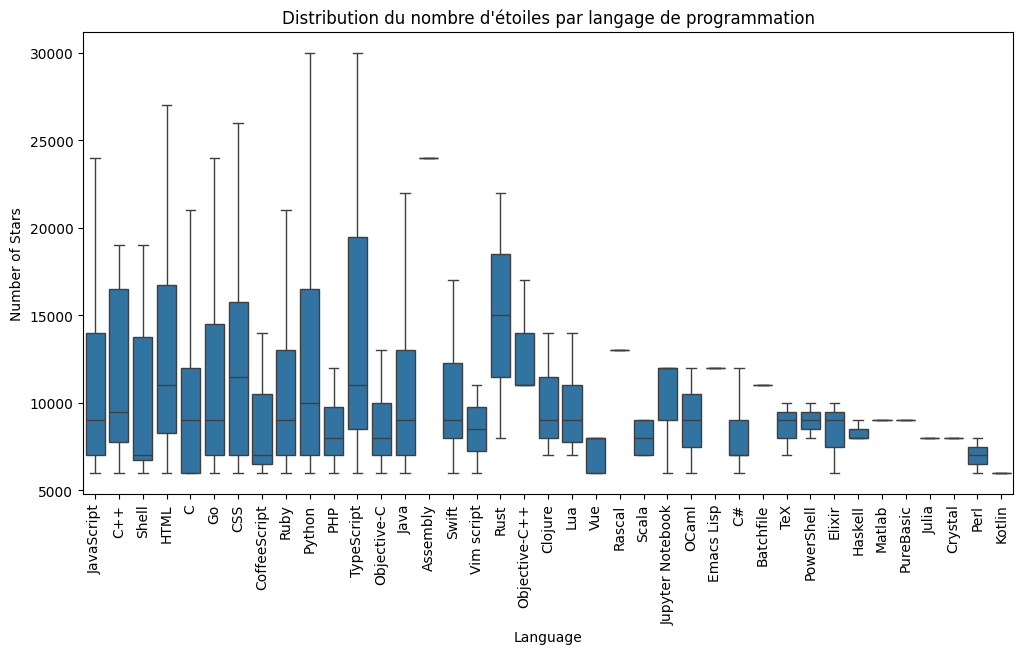

In [ ]:
#17. Afficher la distribution du nombre d'étoiles par langage de programmation ne pas afficher les outliers
?

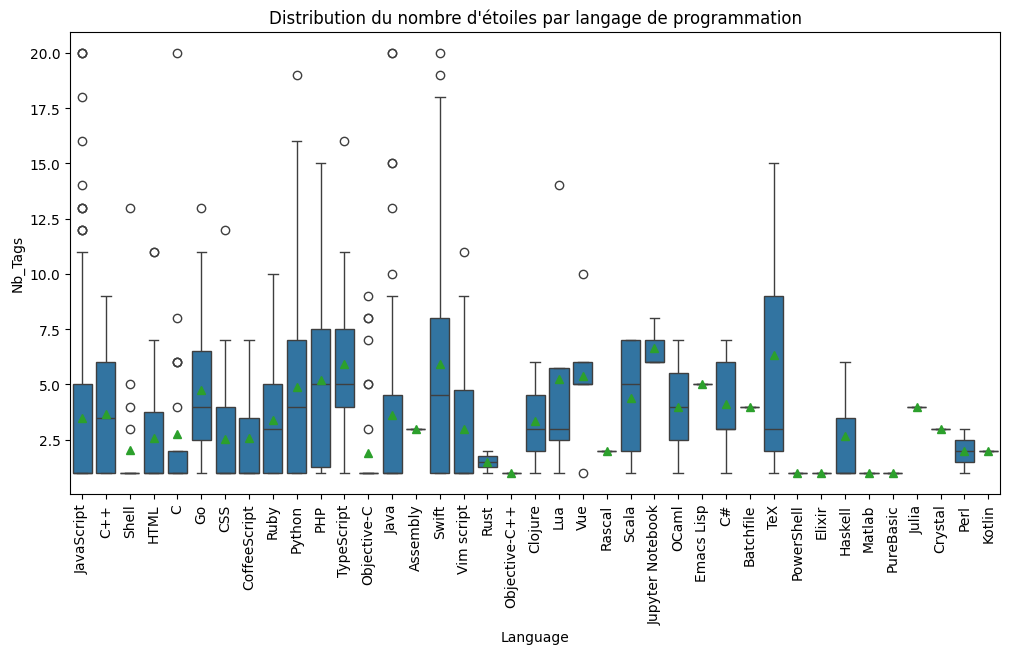

In [ ]:
# 18. Afficher la distribution du nombre de tags par langage de programmation, affiche les outliers et la moyenne sur chaque boxplot
# Indice : Paramètres de la fonction boxplot() du module seaborn


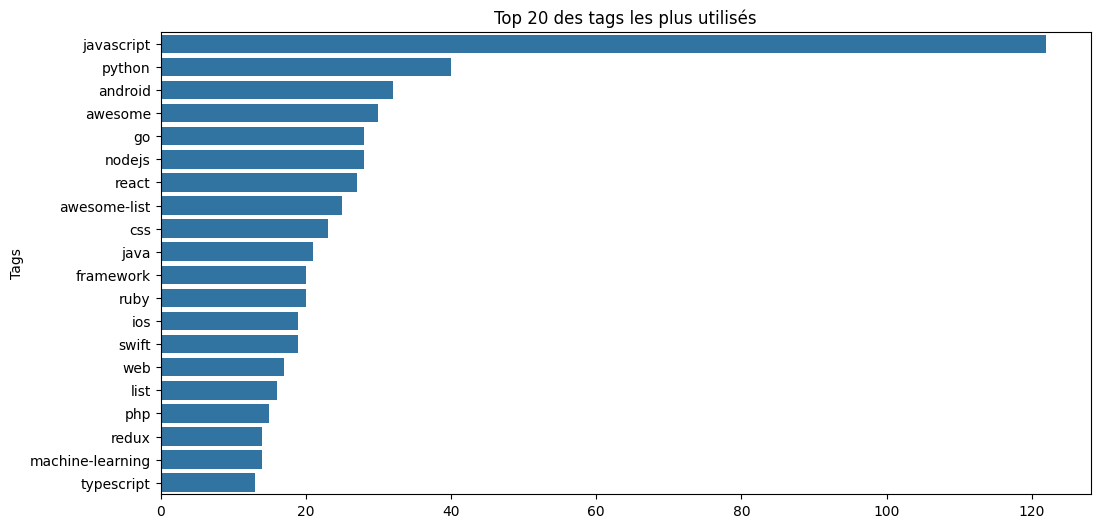

In [ ]:
# 19. Afficher le top 20 des tags les plus utilisés a l'aide de barplot
?

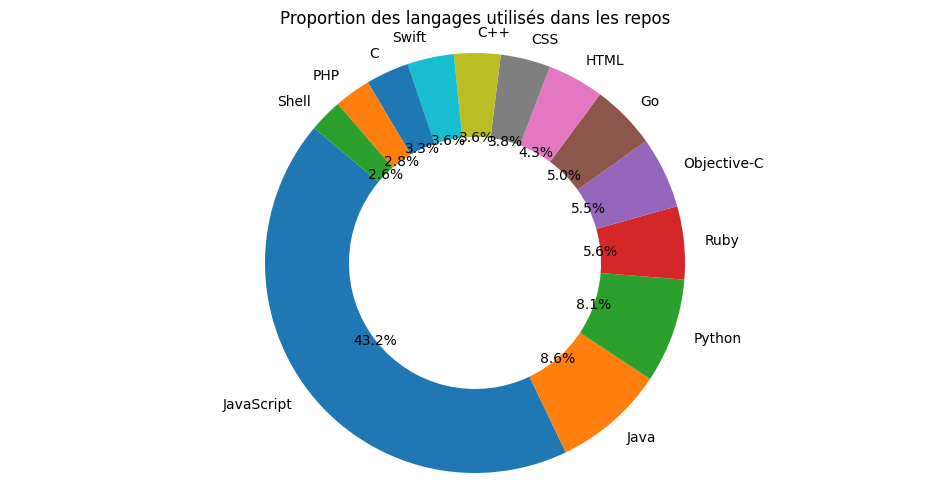

In [ ]:
# 20. Afficher la proportion des langages utilisés dans les repos sous forme de graphique en camembert ou en anneau ne représenter que les langages qui ont une proportion supérieure à 2%
?

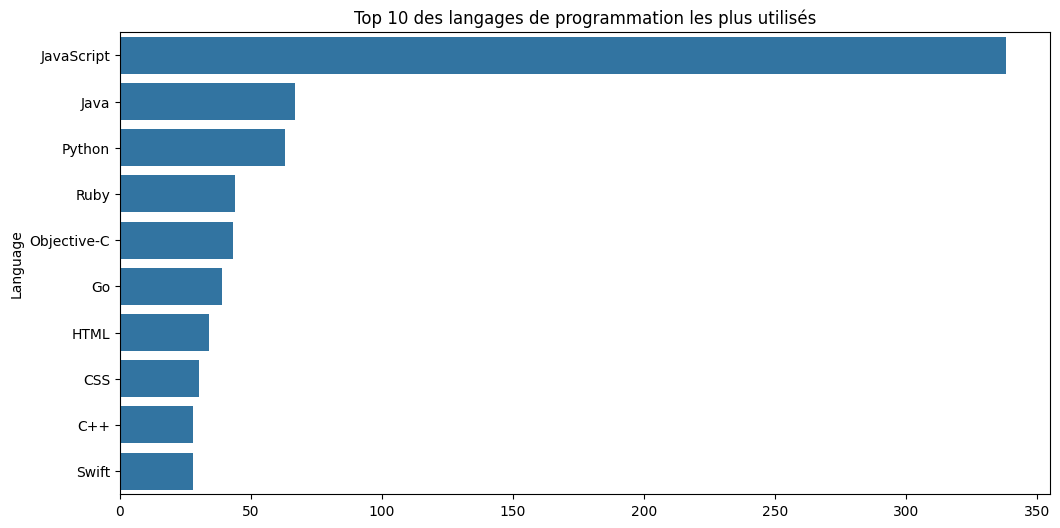

In [ ]:
# 21. Afficher le top 10 des langages de programmation les plus utilisés sous forme de barplot
?

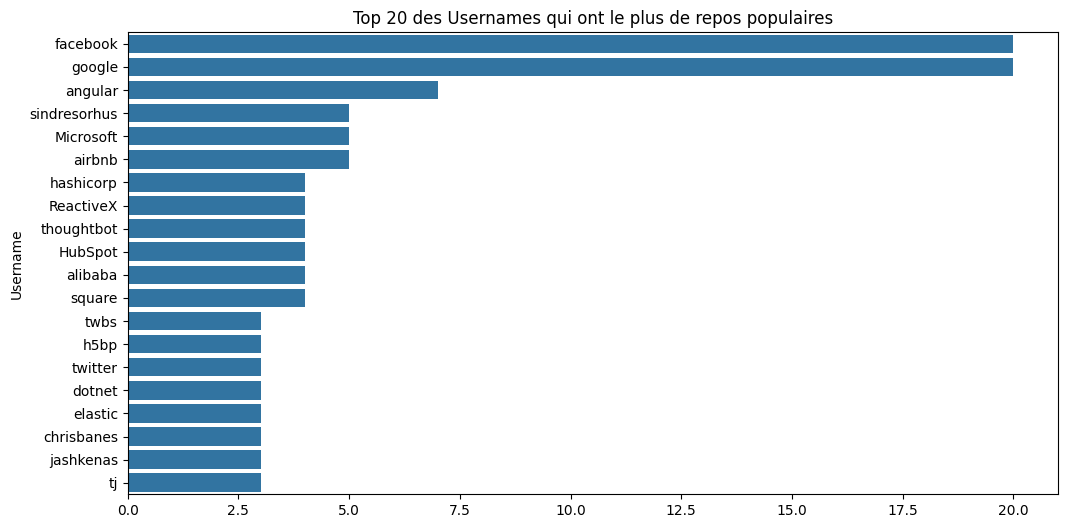

In [ ]:
# 22. Afficher le top 20 des Usernames qui ont le plus de repos populaires
?